In [1]:
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#데이터 로딩
(train_images, train_labels), (test_images, test_labels)=mnist.load_data()
#케라스에서 처리할 수 있는 형태로 변환 샘플개수x가로x세로x차원
train_images=train_images.reshape((60000,28,28,1))
train_images=train_images.astype("float32") / 255
test_images=test_images.reshape((10000,28,28,1))
test_images=test_images.astype("float32") / 255
#원 핫 인코딩
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels[:2])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [2]:
from keras import layers
from keras import models
#모델 생성
model=models.Sequential()
#convolution layer, 필터개수 32, 필터크기 3x3,
#입력데이터 28x28x1(가로, 세로, 채널) (흑백이미지1, 컬러이미지3)
#                     필터수 필터사이즈
model.add(layers.Conv2D(32, (3,3), activation="relu", input_shape=(28,28,1)))
#맥스풀링 필터사이즈 2x2
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation="relu"))
#fully connected layer로 변환(완전연결층)
model.add(layers.Flatten()) # 3차원 -> 1차원
model.add(layers.Dense(64,activation="relu"))
#출력층 10개의 숫자로 분류
model.add(layers.Dense(10,activation="softmax"))
model.compile(optimizer="rmsprop", loss="categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)               0

In [3]:
#모델 학습
hist=model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 12ms/step - loss: 0.1470 - accuracy: 0.9544
Epoch 2/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0432 - accuracy: 0.9870
Epoch 3/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0309 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 22s 11ms/step - loss: 0.0227 - accuracy: 0.9934
Epoch 5/5
1875/1875 [==============================] - 21s 11ms/step - loss: 0.0194 - accuracy: 0.9941


In [4]:
#검증용 데이터로 모델의 성능 평가
test_loss,test_acc=model.evaluate(test_images, test_labels)
test_loss,test_acc

313/313 [==============================] - 1s 3ms/step - loss: 0.0320 - accuracy: 0.9915


(0.032047901302576065, 0.9915000200271606)

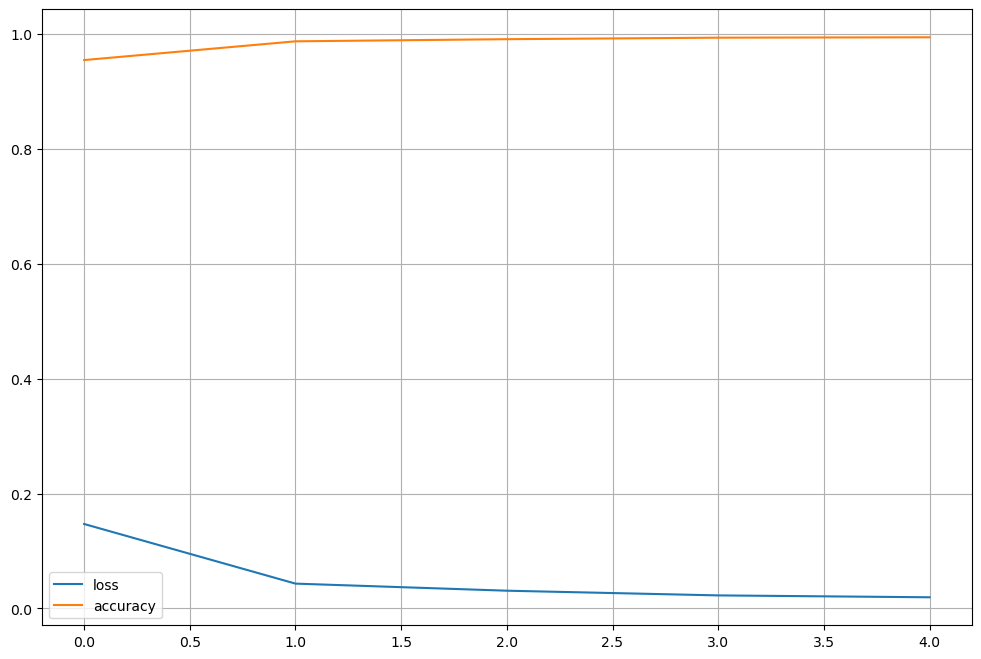

In [5]:
# 모델 학습 과정 표시
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(hist.history['loss']) #손실률
plt.plot(hist.history['accuracy']) #정확도
plt.legend(['loss','accuracy'])
plt.grid()
plt.show()

In [6]:
model.save('c:/data/mnist/mnist.h5')